# Importing the Dependencies

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = 'Mall_Customers.csv'

dataset = pd.read_csv(file_path, sep=',')
display(dataset.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [3]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


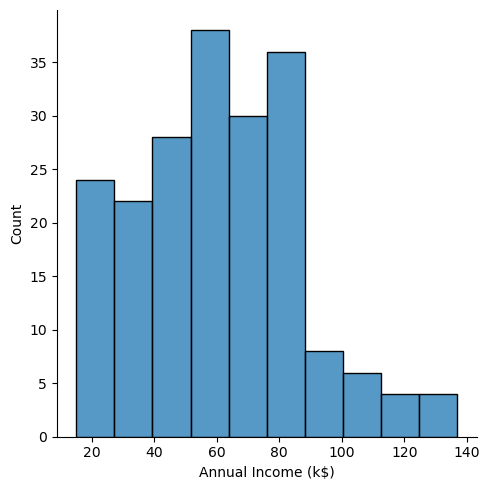

In [4]:
sns.displot(dataset['Annual Income (k$)'])

In [5]:
dataset['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

In [6]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

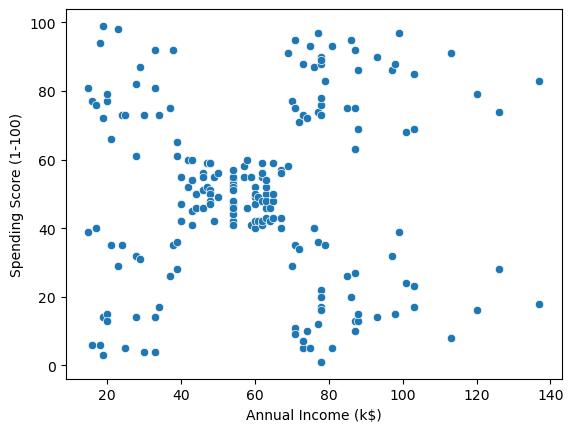

In [7]:
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)')

In [8]:
data = dataset.drop('CustomerID',axis=1)
data.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

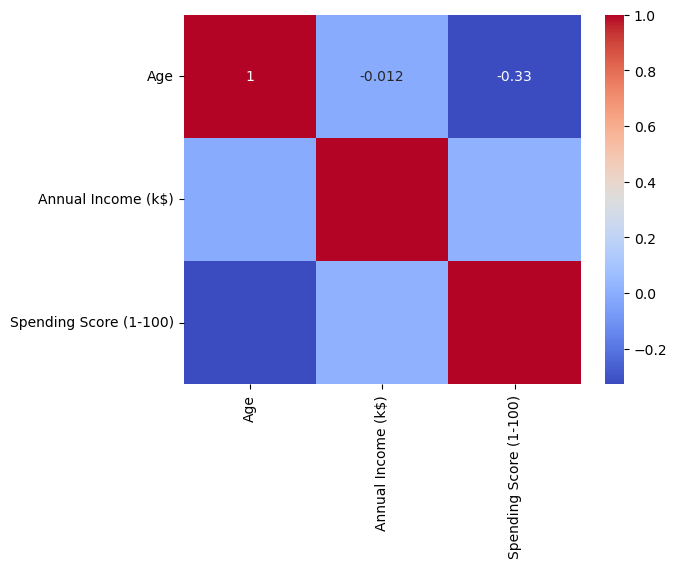

In [9]:
# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['int64'])

# Generate heatmap of correlation matrix
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')

# Clustering - KMeans

In [10]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(dataset[['Annual Income (k$)']])
dataset['Income Clusters'] = clustering1.labels_
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [11]:
clustering1.inertia_

23528.15217391304

In [12]:
inertia_scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [13]:
inertia_scores

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3936.796825396826,
 2822.4996947496948,
 2182.5969696969696,
 1743.4772727272725]

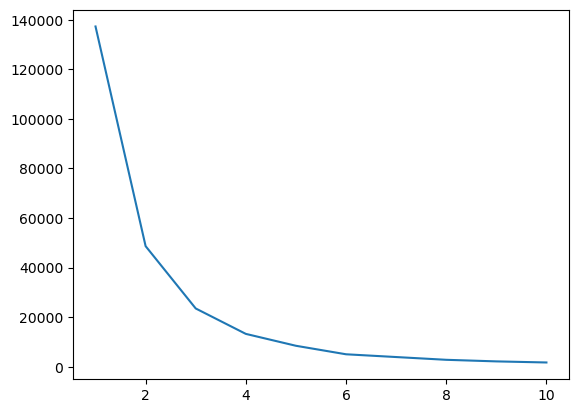

In [14]:
plt.plot(range(1, 11), inertia_scores)

In [15]:
dataset.groupby('Income Clusters')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


## Bivariate Clustering

In [16]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(dataset[['Annual Income (k$)','Spending Score (1-100)']])
dataset['Spending and Income Clustering'] = clustering2.labels_
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Clustering
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,1


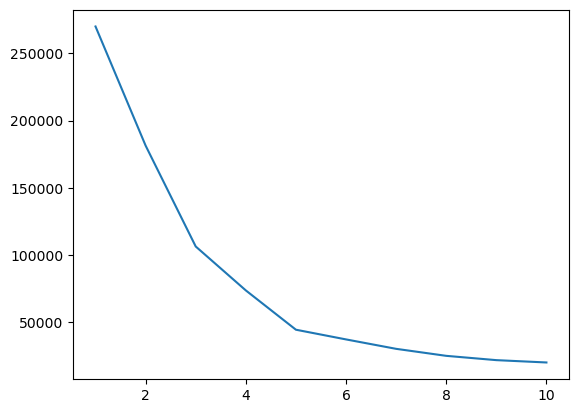

In [17]:
inertia_scores2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1, 11,), inertia_scores2)

In [18]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

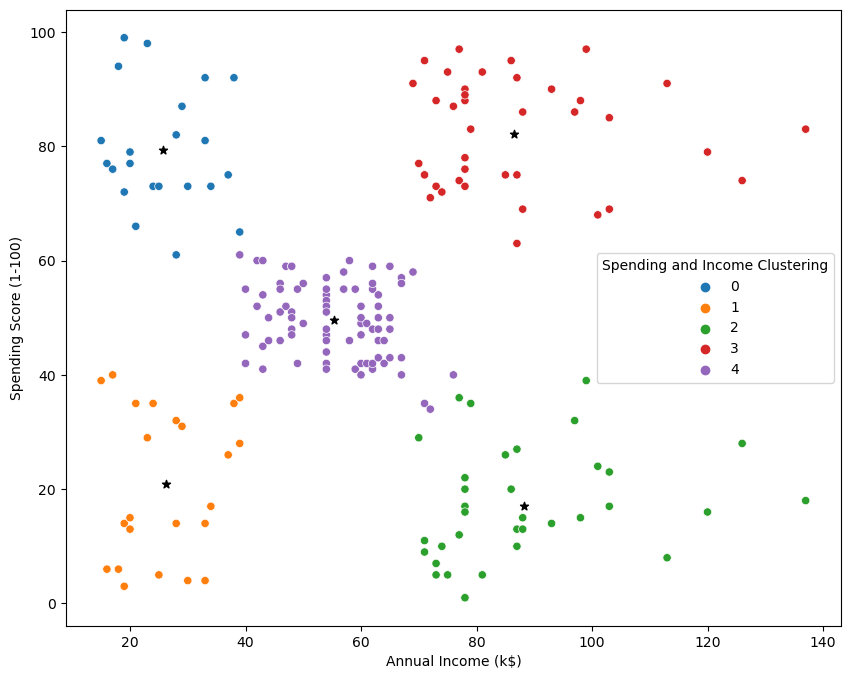

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(x=centers['x'], y=centers['y'], c='black', marker='*')
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Clustering', palette='tab10')

In [20]:
#pd.crosstab(dataset['Spending and Income Clustering'], dataset['Gender'], normalize='index')

In [21]:
dataset_dummies = pd.get_dummies(dataset, drop_first=True)
dataset_dummies = dataset_dummies[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dataset_dummies.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [28]:
scale = StandardScaler()

dataset_dummies = scale.fit_transform(dataset_dummies)
dataset_dummies = pd.DataFrame(scale.fit_transform(dataset_dummies))

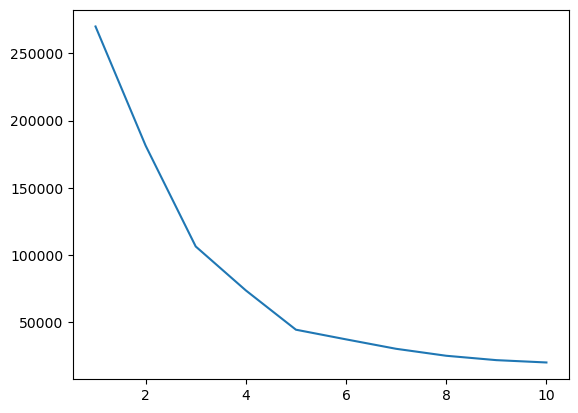

In [29]:
inertia_scores3 = []

for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1, 11,), inertia_scores3)

In [30]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Clustering
0,1,Male,19,15,39,2,1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,1,3
198,199,Male,32,137,18,1,2
